<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aryan rajput\AppData\Local\Temp\ipykernel_4076\2902222986.py:5: SyntaxWarning: invalid escape sequence '\l'
  data = np.genfromtxt("D:\lin_grad.csv", delimiter=",", skip_header=1)
C:\Users\aryan rajput\AppData\Local\Temp\ipykernel_4076\2902222986.py:26: RuntimeWarning: overflow encountered in square
  loss = (1 / N) * np.sum(error**2)
c:\Users\aryan rajput\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


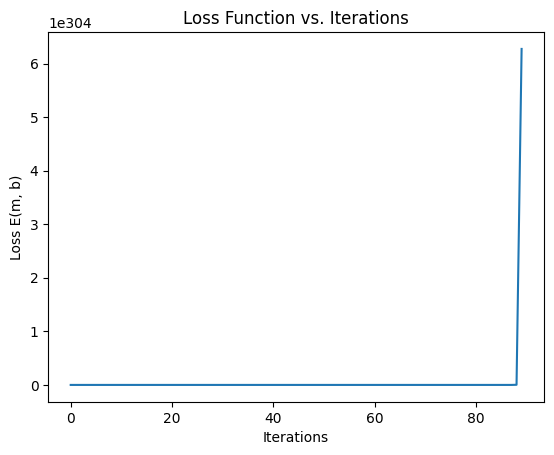

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.genfromtxt("D:\lin_grad.csv", delimiter=",", skip_header=1)
x = data[:, 0]
y = data[:, 1]
N = len(x)

# Initialize parameters
m, b = 0, 0
alpha = 0.01  # Fixed step size
iterations = 100

# To store loss values
loss_fixed = []

# Gradient descent with fixed step size
for _ in range(iterations):
    y_pred = m * x + b
    error = y - y_pred
    dm = -(2 / N) * np.sum(x * error)
    db = -(2 / N) * np.sum(error)
    m -= alpha * dm
    b -= alpha * db
    loss = (1 / N) * np.sum(error**2)
    loss_fixed.append(loss)


plt.xlabel('Iterations')
plt.ylabel('Loss E(m, b)')
plt.title('Loss Function vs. Iterations')

# Plot loss for fixed step size
plt.plot(range(iterations), loss_fixed, label="Fixed Step Size")


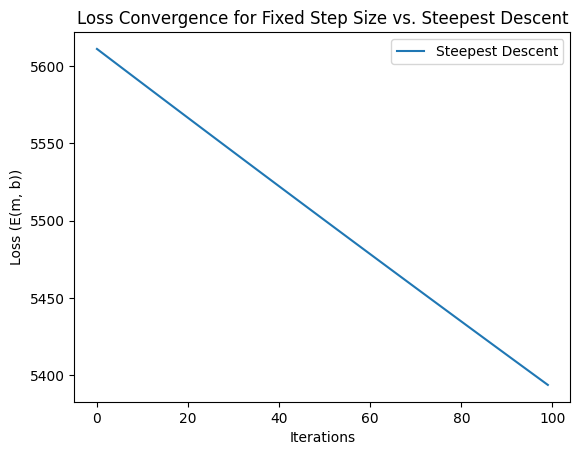

In [6]:
# Steepest descent with dynamic step size
m, b = 0, 0
loss_steepest = []

for _ in range(iterations):
    y_pred = m * x + b
    error = y - y_pred
    dm = -(2 / N) * np.sum(x * error)
    db = -(2 / N) * np.sum(error)

    # Compute optimal alpha (minimizing E with respect to alpha)
    alpha_k = np.sum(error**2) / (np.sum((dm * x + db)**2))

    # Update parameters
    m -= alpha_k * dm
    b -= alpha_k * db
    loss = (1 / N) * np.sum(error**2)
    loss_steepest.append(loss)

# Plot loss for steepest descent
plt.plot(range(iterations), loss_steepest, label="Steepest Descent")

# Final plot
plt.xlabel("Iterations")
plt.ylabel("Loss (E(m, b))")
plt.title("Loss Convergence for Fixed Step Size vs. Steepest Descent")
plt.legend()
plt.show()


In [8]:
# Define the Newton's method update function
def newton_update(x):
    numerator = 9 * (x - 7)**2 - 4 * (x - 7)
    denominator = 4
    return x - numerator / denominator

# Function to perform Newton's method for multiple starting points
def newtons_method(starting_points, iterations):
    results = {}
    for x0 in starting_points:
        x_values = [x0]
        for _ in range(iterations):
            x_values.append(newton_update(x_values[-1]))
        results[x0] = x_values
    return results

# Starting points and number of iterations
starting_points = [7.40, 7.20, 7.01, 7.80, 7.88]
iterations = 5

# Perform Newton's method
results = newtons_method(starting_points, iterations)

# Print results
for start, values in results.items():
    print(f"Starting point: {start}")
    for i, val in enumerate(values):
        print(f"  Iteration {i}: x = {val}")
    print()


Starting point: 7.4
  Iteration 0: x = 7.4
  Iteration 1: x = 7.44
  Iteration 2: x = 7.4444
  Iteration 3: x = 7.44444444
  Iteration 4: x = 7.444444444444445
  Iteration 5: x = 7.444444444444445

Starting point: 7.2
  Iteration 0: x = 7.2
  Iteration 1: x = 7.3100000000000005
  Iteration 2: x = 7.403775
  Iteration 3: x = 7.44072293609375
  Iteration 4: x = 7.444413282789535
  Iteration 5: x = 7.444444442259584

Starting point: 7.01
  Iteration 0: x = 7.01
  Iteration 1: x = 7.019774999999999
  Iteration 2: x = 7.0386701360937485
  Iteration 3: x = 7.073975668480101
  Iteration 4: x = 7.135638438024277
  Iteration 5: x = 7.229881857841807

Starting point: 7.8
  Iteration 0: x = 7.8
  Iteration 1: x = 7.16
  Iteration 2: x = 7.2624
  Iteration 3: x = 7.369879040000001
  Iteration 4: x = 7.431934445479527
  Iteration 5: x = 7.444092319277715

Starting point: 7.88
  Iteration 0: x = 7.88
  Iteration 1: x = 7.0176
  Iteration 2: x = 7.03450304
  Iteration 3: x = 7.066327545519206
  Itera

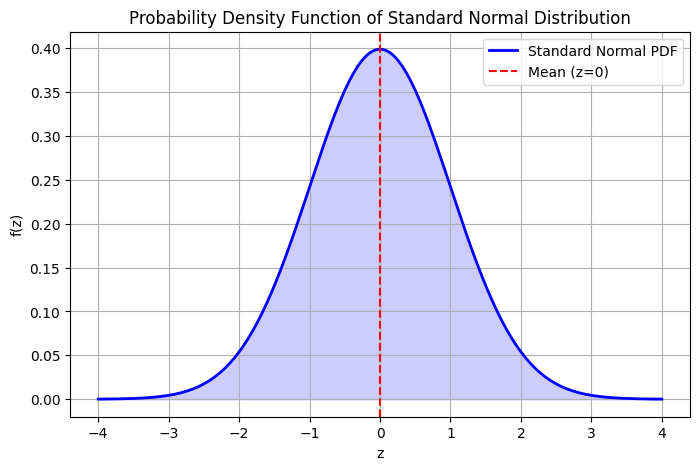

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate values for the standard normal distribution
z_values = np.linspace(-4, 4, 1000)  # Range of z-values
pdf_values = norm.pdf(z_values, loc=0, scale=1)  # PDF for N(0, 1)

# Plot the standard normal distribution
plt.figure(figsize=(8, 5))
plt.plot(z_values, pdf_values, color='blue', linewidth=2, label='Standard Normal PDF')
plt.title('Probability Density Function of Standard Normal Distribution')
plt.xlabel('z')  # x-axis label
plt.ylabel('f(z)')  # y-axis label
plt.axvline(x=0, color='red', linestyle='--', label='Mean (z=0)')  # Highlight mean at z=0
plt.fill_between(z_values, pdf_values, alpha=0.2, color='blue')  # Shade the area under the curve
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from scipy.optimize import linprog
# Coefficients of the objective function (maximize Star Wars books: x)
c = [-1, 0]  # -x because linprog minimizes by default

# Coefficients for inequality constraints
A = [
    [12, 5],   # Budget constraint (12x + 5y <= 100)
    [-1, -1]   # Minimum books constraint (x + y >= 12, flipped to <= -12)
]

# Right-hand side of the constraints
b = [100, -12]

# Bounds for x and y (non-negativity)
x_bounds = (0, None)  # x >= 0
y_bounds = (0, None)  # y >= 0

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Extract results
optimal_values = result.x  # x, y values
max_star_wars_books = optimal_values[0]  # Value of x

optimal_values, int(max_star_wars_books)  # Return the integer number of Star Wars books


(array([5.71428571, 6.28571429]), 5)

In [ ]:
from scipy.optimize import linprog

# Coefficients of the objective function (maximize profit, so use negative values)
c = [-20, -15, -25]  # Coefficients of 20x + 15y + 25z (negative for maximization)

# Coefficients of the inequality constraints
A = [
    [2, 1, 2],  # Casting constraint: 2x + y + 2z <= 8
    [2, 2, 3],  # Assembly constraint: 2x + 2y + 3z <= 12
    [2, 1, 3],  # Quality control constraint: 2x + y + 3z <= 10
]

# Right-hand side of the inequality constraints
b = [8, 12, 10]

# Bounds for the variables (x, y, z must be >= 0)
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)

# Solve the linear programming problem using Simplex method
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='simplex')

# Output the results
if result.success:
    print(f"Optimal number of toy cars: {result.x[0]:.2f}")
    print(f"Optimal number of toy motorcycles: {result.x[1]:.2f}")
    print(f"Optimal number of toy boats: {result.x[2]:.2f}")
    print(f"Maximum profit per day: ${-result.fun:.2f}")
else:
    print("No solution found.")
